<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: <!-- Your answers goes here -->
The difference between the two sets of train/validation sets is that there is imbalanced data in the target variable y in train and valid data sets. There is variation in total number of "yes" and "no" in train and valid datasets.
The dataset for train_2 is more than train_1


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.All the features that have continuous numerica values can be calculated using d_type function that includes data type - "number" .Those features are listed in the cell below.
Numerical - ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'].

2.All the features that have continuous numerica values can be calculated using d_type function that excludes data type - "number" .Those features are listed in the cell below.
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'y']

3.The features that have missing values are - 
1."pdays" - this feature has -1 values which is misleading and not correct as number of days cannot be negative. These have been handled by replacing -1 values by the mean of that column
2.There are various features which have "UNKNOWN" values . These have been handled by treating them as a separate category which can be done by one hot encoding.



Importing Libraries

In [409]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import timeit
import random
from numpy.linalg import inv
from sklearn.datasets import load_boston
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [410]:
# PROBLEM 1, TASK 1 CODE GOES HERE
train1 = pd.read_csv("train_1.csv") 
train2 = pd.read_csv("train_2.csv")
valid1 = pd.read_csv("valid_1.csv")
valid2 = pd.read_csv("valid_2.csv")
test1=pd.read_csv("test.csv")

# print(train1.dtypes)
#numeric columns

# cols1 = train1.columns
num_cols1 = train1.select_dtypes(include=['number'])
num_cols2 = train2.select_dtypes(include=['number'])
num_cols3 = valid1.select_dtypes(include=['number'])
num_cols4 = valid2.select_dtypes(include=['number'])
print("Numerical Features =",num_cols1.columns)

#categorical 
cat1=train1.select_dtypes(exclude=['int64']).columns
cat2=train2.select_dtypes(exclude=['int64']).columns
cat3=valid1.select_dtypes(exclude=['int64']).columns
cat4=valid2.select_dtypes(exclude=['int64']).columns
print("Categorical Features =",cat1)
# print(cat2)
# print(cat3)
# print(cat4)


Numerical Features = Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical Features = Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


This function is used for feature normalization

In [380]:
#Normalizing train1.csv numerical features
def feature_normalization(X):
    df=pd.DataFrame(data=X)
    mu=df.mean()
    sigma=df.std(axis=0)
    X_norm = (df-mu)/sigma
    return X_norm

In [381]:
def get_data(data):
    # Handling missing values - ( pdays has some -1 values)
    findL = -1
    replaceL = data["pdays"].mean()
    col = "pdays"
    data[col] = data[col].replace(findL, replaceL)
    t1=data.select_dtypes(include=['number'])
#     print(t1)
    for i in t1:
        data[i]=feature_normalization(data[i])
        
    cat=[]
    c1=data.select_dtypes(exclude=["number"])
    for i in c1:
        cat.append(i)
    data=pd.get_dummies(data,columns=cat)
    data=data.drop(["y_no"],axis=1)
    return(data)

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

In [382]:
train1=get_data(train1) 
valid1=get_data(valid1)
test1=get_data(test1)

maximum_accuracy_ModelA 0.7611412141988279


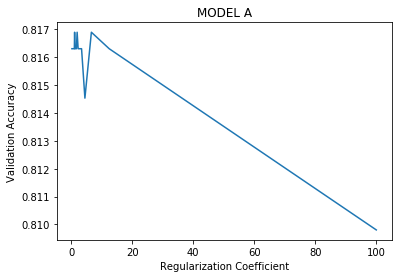

In [383]:
# X=train1.drop
X = train1.drop(["y_yes"],axis=1)
y = train1["y_yes"]

X1 = valid1.drop(["y_yes"],axis=1)
y1 = valid1["y_yes"]

X_test1= test1.drop(["y_yes"],axis=1)
y_test1= test1["y_yes"]

lambdas=[]
scores=[]
scores_test1=[]
c=0.01
for i in range(50):
    lambdas.append(1/c)
    logisticRegr = LogisticRegression(C=c)
    logisticRegr.fit(X,y)
    scores.append(logisticRegr.score(X1,y1))
    scores_test1.append(logisticRegr.score(X_test1,y_test1))
    c=c+0.07
# print(scores)
 
plt.figure()
plt.plot(lambdas,scores)
plt.xlabel('Regularization Coefficient')
plt.ylabel('Validation Accuracy')
plt.title("MODEL A")

print("maximum_accuracy_ModelA",max(scores_test1))
# print(valid1.shape)
# print(train1.shape)
#max(score)
#max(regularization coeff)

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

maximum_accuracy_ModelB 0.9018024991706293


Text(0.5,1,'MODEL B')

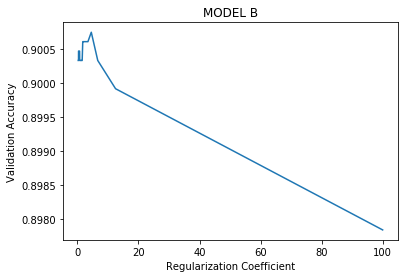

In [384]:
# PROBLEM 1, TASK 3 CODE GOES HERE
train2=get_data(train2) 
valid2=get_data(valid2)

X = train2.drop(["y_yes"],axis=1)
y = train2["y_yes"]

X1 = valid2.drop(["y_yes"],axis=1)
y1 = valid2["y_yes"]


# X_test2= test1.drop(["y_yes"],axis=1)
# y_test2= test1["y_yes"]

# train2
lambdas=[]
scores=[]
scores_test2=[]
c=0.01
for i in range(50):
    lambdas.append(1/c)
    logisticRegr = LogisticRegression(C=c)
    logisticRegr.fit(X,y)
    scores.append(logisticRegr.score(X1,y1))
    scores_test2.append(logisticRegr.score(X_test1,y_test1))
    c=c+0.07
# print(scores)

print("maximum_accuracy_ModelB",max(scores_test2))
plt.figure()
plt.plot(lambdas,scores)
plt.xlabel('Regularization Coefficient')
plt.ylabel('Validation Accuracy')
plt.title("MODEL B")


### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

In [402]:
# PROBLEM 1, TASK 4 CODE GOES HERE
#both training and validation
#point at which validation acc becomes maximum
import sklearn.linear_model
from sklearn.metrics import accuracy_score

X = train2.drop(["y_yes"],axis=1)
y = train2["y_yes"]
X1 = valid2.drop(["y_yes"],axis=1)
y1 = valid2["y_yes"]

lambdas=[1/0.1,1/0.2,1/0.3,1/0.4,1/0.5,1/0.6]
thetas=[0.02,0.5,0.7,2,0.9]


result = {"lambdas":[],"thetas":[],"accuracy":[]}
accuracy={}
# test_accuracy={}
for i in lambdas:
    modelC = LogisticRegression(C = i)
    modelC.fit(X,y)
    scores=modelC.score(X1,y1)
    test_score=modelC.score(X_test1,y_test1)
#     test_score= np.arange(4).reshape((2,2))
#     print(test_score)
    test_score1=np.max(test_score)
    ModelC_test=np.asarray(test_score1)
    print("ModelC_Maximum_Accuracy:",np.ndarray.max(ModelC_test))
    
          
    
    for each in thetas:
        y_predict = np.where(modelC.predict_proba(X1)[:,1]>= each, 1, 0)
#         accuracy[(i,each)] = accuracy_score(y1,y_predict)

    for each in thetas: 
        if each not in accuracy:
            accuracy[each]=[]
        accuracy[each].append(accuracy_score(y1,y_predict))
#         if each not in test_accuracy:
#             test_accuracy[each]=[]
#         test_accuracy[each].append(accuracy_score(y_test1,y_predict))
#     print("Accuracy",accuracy)
            
    for each in accuracy:
        if accuracy[each] == max(accuracy.values()):
            result["lambdas"].append(1/c)
            result["thetas"].append(each)
            result["accuracy"].append(max(accuracy.values()))
#             result["test_accuracy"].append(max(test_accuracy.values()))
            
    
# print("maximum_accuracy_ModelC",max(test_score))
result = pd.DataFrame(result)
result
    

ModelC_Maximum_Accuracy: 0.9018024991706293
ModelC_Maximum_Accuracy: 0.9018024991706293
ModelC_Maximum_Accuracy: 0.9018024991706293
ModelC_Maximum_Accuracy: 0.9018024991706293
ModelC_Maximum_Accuracy: 0.9018024991706293
ModelC_Maximum_Accuracy: 0.9018024991706293


,lambdas,thetas,accuracy
0,0.2849,0.02,"[0.8871993364666851, 0.8871993364666851, 0.887..."
1,0.2849,0.50,"[0.8871993364666851, 0.8871993364666851, 0.887..."
2,0.2849,0.70,"[0.8871993364666851, 0.8871993364666851, 0.887..."
3,0.2849,2.00,"[0.8871993364666851, 0.8871993364666851, 0.887..."
4,0.2849,0.90,"[0.8871993364666851, 0.8871993364666851, 0.887..."
5,0.2849,0.02,"[0.8871993364666851, 0.8871993364666851, 0.887..."
6,0.2849,0.50,"[0.8871993364666851, 0.8871993364666851, 0.887..."
7,0.2849,0.70,"[0.8871993364666851, 0.8871993364666851, 0.887..."
8,0.2849,2.00,"[0.8871993364666851, 0.8871993364666851, 0.887..."
9,0.2849,0.90,"[0.8871993364666851, 0.8871993364666851, 0.887..."


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.



1.Since, the test data is more than the train data, it takes more time to calculate accuracy for test data set.
The data for model A calculated above (76%) is less than the accuracy of B(90%) and C (90%). The data for model B and C is large and hence , we get more accuracy for them because Model B and C is able to correctly label due to this reason, as compared to model A. 

2.Accuracy is a good metric to find the hyperparameters is good , as we are able to identify which model is able to lable the data and how much of the data is being labeled correctly

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

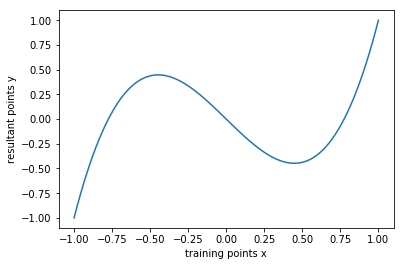

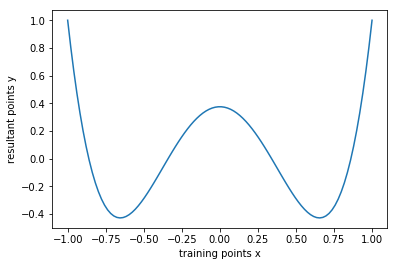

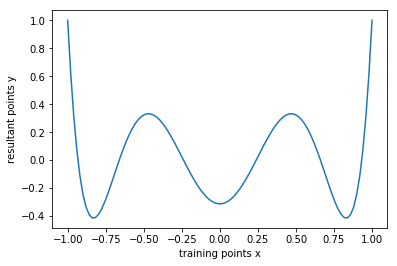

In [414]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x = np.linspace(low,high,100) 
    y=[]     
    for i in x:
        vect=[]
        for j in range(degree+1):
            vect.append(i**j)
        y.append(np.dot(w,np.transpose(vect)))
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('training points x')
    plt.ylabel('resultant points y')

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)




### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [415]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples - x  values
    - n_test - Number of test samples - x values
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
   """
    w = get_coefficients(degree)
    X_train=np.linspace(-1,1,n_train)
    X_test=np.linspace(-1,1,n_test)
    y_train=[]
    y_test=[]
    w = get_coefficients(degree) 
    noise = np.random.normal(0,sigma)
    for i in X_train:
        vect=[]
        for j in range(degree+1):
            vect.append(i**j)
        y_train.append(np.dot(w,np.transpose(vect))+np.random.normal(0,sigma))
        
    for i in X_test:
        vect=[]
        for j in range(degree+1):
            vect.append(i**j)
        y_test.append(np.dot(w,np.transpose(vect))+np.random.normal(0,sigma))
    
  
    return X_train, y_train, X_test, y_test


### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

Importing Libraries

In [416]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics

Step 1 - Generating Dataset

In [417]:
X_train, y_train, X_test, y_test = generate_dataset(10, 20, 20, 0.2)
dataset=generate_dataset(10, 20, 20, 0.2)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

Step 2 - Plotting the generated points by calling visualize function

Text(0.5,1,'Plot with 10 degree polynomial')

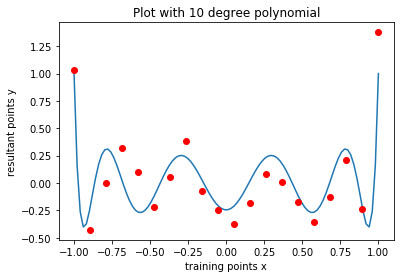

In [418]:
visualize_function(10,-1,1)
plt.plot(X_train,y_train,"ro")
plt.title("Plot with 10 degree polynomial")

Step 3 -  
Building the model A with degree 2 and Model B with degree 10

In [419]:
#Model A with Quadratic degree 
modelA=PolynomialFeatures(degree=2) 
linear_modelA= linear_model.LinearRegression()

X_points=modelA.fit_transform(X_train.reshape(-1,1))

linear_modelA.fit(X_points,y_train)

X_pred=modelA.fit_transform(X_train.reshape(-1,1))
y_pred_train=linear_modelA.predict(X_pred)


Y_points=modelA.fit_transform(X_test.reshape(-1,1))

linear_modelA.fit(Y_points,y_test)

z_pred=modelA.fit_transform(X_test.reshape(-1,1))
y_pred_test=linear_modelA.predict(z_pred)

#Model B with Quadratic degree 

modelB=PolynomialFeatures(degree=10) 
linear_modelB= linear_model.LinearRegression()

X_points1=modelB.fit_transform(X_train.reshape(-1,1))

linear_modelB.fit(X_points1,y_train)

X_pred1=modelB.fit_transform(X_train.reshape(-1,1))
y_pred_train1=linear_modelB.predict(X_pred1)


Y_points1=modelB.fit_transform(X_test.reshape(-1,1))

linear_modelB.fit(Y_points1,y_test)

z_pred1=modelB.fit_transform(X_test.reshape(-1,1))
y_pred_test1=linear_modelB.predict(z_pred1)

Step 4 - 
Calculating Training and test accuracies and representing it in the form of table below.

In [425]:
# print("Mean Squared Error:", metrics.mean_squared_error(y_test.reshape(-1,1),model(2).reshape(-1,1)))

A_Train=(metrics.mean_squared_error(y_train.reshape(-1,1),y_pred_train.reshape(-1,1)))
A_Test=(metrics.mean_squared_error(y_test.reshape(-1,1),y_pred_test.reshape(-1,1)))

# print(A_Train)
# print(A_Test)
B_Train=(metrics.mean_squared_error(y_train.reshape(-1,1),y_pred_train1.reshape(-1,1)))
B_Test=(metrics.mean_squared_error(y_test.reshape(-1,1),y_pred_test1.reshape(-1,1)))

Table={"Training":[A_Train,B_Train],"Test":[A_Test,B_Test]}
Table_df = pd.DataFrame(Table)
Table_df.set_index([['ModelA','ModelB'], 'Model'])
print(Table_df)

KeyError: 'Model'

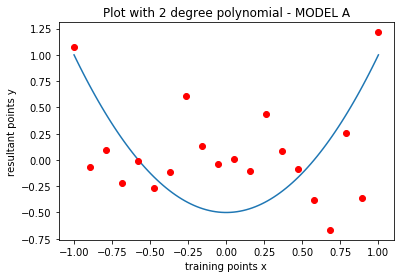

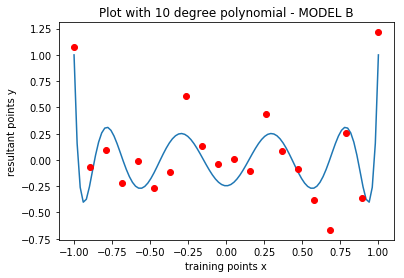

In [269]:
visualize_function(2,-1,1)
plt.plot(X_train,y_train,"ro")
plt.title("Plot with 2 degree polynomial - MODEL A")

visualize_function(10,-1,1)
plt.plot(X_train,y_train,"ro")
plt.title("Plot with 10 degree polynomial - MODEL B")
plt.show()


Step - 5 -
The results are expected here as we can see in the two graphs ploted above for degree 2 and degree 10.
The plot with 2 degree polynomial is not able to fit better because we can see that the points are more far away from the fitting curve as compared to the plot 1 with 10 degree polynomial which is able to fit better , the points are also mostly closer to the fitting curve. 
This is the reason why training error and Test error of Model  (2 Degree)  is more than the corresponding errors of model B(10 Degree)


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

Step 1 - Generating Dataset without noise

In [218]:
dataset=generate_dataset(45, 20, 20, 0)
X_train=dataset[0]
y_train=dataset[1]
X_test=dataset[2]
y_test = dataset[3]

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)


Step - 2
Calling visualize function to plot the graph

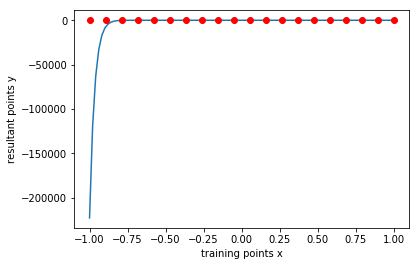

In [257]:
visualize_function(45,-1, 1)
plt.plot(X_train,y_train,"ro")

Step - 3 
Created a function for creating two models which can be easily called while calculating the Training and test errors.
This function returns predicted y values for the model.

In [220]:
def model(deg):
    modelA=PolynomialFeatures(degree=deg) #test fit
    linear_modelA= linear_model.LinearRegression()

    X_points=modelA.fit_transform(X_train.reshape(-1,1))

    linear_modelA.fit(X_points,y_train)

    X_pred=modelA.fit_transform(X_train.reshape(-1,1))
    y_pred=linear_modelA.predict(X_pred)

    return y_pred

Step - 4 
Calculating Training and test accuracies and representing it in the form of table below.

In [349]:
A_Train=(metrics.mean_squared_error(y_train.reshape(-1,1),model(2).reshape(-1,1)))
A_Test=(metrics.mean_squared_error(y_test.reshape(-1,1),model(2).reshape(-1,1)))

B_Train=(metrics.mean_squared_error(y_train.reshape(-1,1),model(10).reshape(-1,1)))
B_Test=(metrics.mean_squared_error(y_test.reshape(-1,1),model(10).reshape(-1,1)))

Table={"Training":[A_Train,B_Train],"Test":[A_Test,B_Test]}
Table_df = pd.DataFrame(Table)
print(Table_df)


   Training      Test
0  0.176347  0.127928
1  0.033019  0.060056


Since there is zero noise , that is there is no uncertainity surrounding the data points and the regression curve, all the predicted values lie on the regression curve(Blue line). There are no outliers here. And this indicates that overfitting occurs here.